#ID0309 - Aprendizaje Estadístico

### Otoño 2023

### ID0309_Lab_3.3

**Enrique Naredo García**

<font size = 2>
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Se recuerda no compartir esta información fuera de los integrantes registrados en este curso. La reproducción total o parcial de este documento requiere autorización por escrito del titular del copyright.*
</font>

#Mapa Autoorganizado

Un [mapa autoorganizado](https://es.wikipedia.org/wiki/Mapa_autoorganizado) (en inglés: self-organizing map, SOM) o un mapa autoorganizado de características (self-organizing feature map, SOFM) es un tipo de red neuronal artificial (ANN por sus siglas en inglés), que es entrenada usando aprendizaje no supervisado para producir una representación discreta del espacio de las muestras de entrada, llamado mapa.

El mapa autoorganizado (SOM) es un algoritmo de aprendizaje automático no supervisado introducido por Teuvo Kohonen en la década de 1980.
* Como sugiere el nombre, el mapa se organiza solo sin instrucciones de otros.
* Es un modelo inspirado en el cerebro humano.
* Un área diferente de la corteza cerebral de nuestro cerebro es responsable de actividades específicas.
* Una información sensorial como la visión, el oído, el olfato y el gusto se asigna a las neuronas de un área de la corteza correspondiente a través de sinapsis de forma autoorganizada.
* También se sabe que las neuronas con una producción similar están próximas.


SOM se entrena a través de una red neuronal competitiva, una red de retroalimentación de una sola capa que se asemeja a estos mecanismos cerebrales.

* El algoritmo del SOM es relativamente simple, pero puede haber cierta confusión a primera vista y dificultades para saber cómo aplicarlo en la práctica.
* Quizás sea porque SOM puede entenderse desde múltiples perspectivas.
* Es como el Análisis de Componentes Principales (PCA) para la reducción de dimensionalidad y visualización.
* SOM también puede considerarse un tipo de aprendizaje múltiple que maneja la reducción de dimensionalidad no lineal.
* SOM también se utiliza en minería de datos por su propiedad de cuantificación vectorial.
* El tren puede representar datos observables de alta dimensión en un espacio latente de menor dimensión, generalmente en una cuadrícula cuadrada 2D, preservando al mismo tiempo la topología del espacio de entrada original.
* Pero el mapa también se puede utilizar para proyectar nuevos puntos de datos y ver qué grupo pertenece al mapa.

En este ejemplo, el objetivo es la comprensión de la red neuronal de mapas autoorganizados con código Python Aprendizaje automático no supervisado inspirado en el cerebro a través de la competencia, la cooperación y la adaptación

In [1]:
# importar librerías
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [2]:
# montar Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# datos utilizado en este ejemplo
# banknote authentication Data Set
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication
# Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml].
# Irvine, CA: University of California, School of Information and Computer Science.

data_file = "data_banknote_authentication.txt"
path_file = "/content/drive/MyDrive/Datasets/"

In [4]:
# datos
data_x = np.loadtxt(path_file+data_file,
    delimiter=",", skiprows=0, usecols=range(0,4),
    dtype=np.float64)

print(data_x)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [5]:
# clases
data_y = np.loadtxt(path_file+data_file,
          delimiter=",", skiprows=0, usecols=(4,),
                    dtype=np.int64)
print(data_y)

[0 0 0 ... 1 1 1]


In [6]:
# datos de entrenamiento y prueba
train_x, test_x, train_y, test_y = \
      train_test_split(data_x, data_y, test_size=0.2,
      random_state=42)

print(train_x.shape, train_y.shape,
      test_x.shape, test_y.shape)

(1097, 4) (1097,) (275, 4) (275,)


In [7]:
# normalización de datos
def normalizacion(data):
  escalar = MinMaxScaler()
  escalado = escalar.fit_transform(data)
  return escalado

In [8]:
# distancia Euclideana
def dist_Euclideana(x,y):
  return distance.euclidean(x,y)

In [9]:
# distancia de Manhattan
def dist_Manhattan(x,y):
  return distance.cityblock(x,y)

In [10]:
# busca la neurona ganadora dentro del mapa (som)
# Best Matching Unit search (BMUS)
# t = indice de muestra aleatoria de entrenamiento
def BMUS(data, t, som):
  ganadora = [0,0]
  # inicializa con la distancia más grande
  dist_mascorta = np.sqrt(data.shape[1])
  # distancia más corta de la muestra con los valores en el mapa
  for row in range(som.shape[0]):
    for col in range(som.shape[1]):
      # calcula la distancia Euclideana
      distancia = dist_Euclideana(som[row][col], data[t])
      # checa si encontro una distancia más corta
      if distancia < dist_mascorta:
        # actualiza la distancia más corta
        dist_mascorta = distancia
        # coordenadas de la celda
        ganadora = [row,col]
  # regresa las coordenadas de la celda
  return ganadora

In [11]:
# tasa de aprendizaje y rango de vecindad
def decaimiento(iter, max_iters, max_tasa_aprendizaje,
                max_m_distancia):
  coeficiente = 1.0 - (np.float64(iter) / max_iters)
  tasa_aprendizaje = coeficiente * max_tasa_aprendizaje
  rango_vecindario = ceil(coeficiente * max_m_distancia)
  return tasa_aprendizaje, rango_vecindario

In [12]:
# normalización de datos de entrenamiento
train_x_norm = normalizacion(train_x)
print("mínimo: ", np.min(train_x_norm))
print("máximo: ", np.max(train_x_norm))

mínimo:  0.0
máximo:  1.0000000000000002


In [13]:
# initialización SOM

# número de dimensiones en los datos de entrada
num_dims = train_x_norm.shape[1]
print(num_dims)
np.random.seed(7)

4


In [14]:
# hiperparametros
num_filas = 10
num_cols = 10
max_m_distancia = 4
max_tasa_aprendizaje = 0.5
max_iters = int(5*10e3) #50000

In [15]:
# construcción de SOM
# pesos aleatorios en el rango de [0,1]
som = np.random.random_sample(size=(num_filas, num_cols,
                                    num_dims))
print("SOM con dimensiones de: ",som.shape)
print(f"El valor mínimo es de {np.min(som)}, \
        y \nel valor máximo es de {np.max(som)}")

SOM con dimensiones de:  (10, 10, 4)
El valor mínimo es de 0.0014268805627581926,         y 
el valor máximo es de 0.999208301397325


In [16]:
print(som)

[[[0.07630829 0.77991879 0.43840923 0.72346518]
  [0.97798951 0.53849587 0.50112046 0.07205113]
  [0.26843898 0.4998825  0.67923    0.80373904]
  [0.38094113 0.06593635 0.2881456  0.90959353]
  [0.21338535 0.45212396 0.93120602 0.02489923]
  [0.60054892 0.9501295  0.23030288 0.54848992]
  [0.90912837 0.13316945 0.52341258 0.75040986]
  [0.66901324 0.46775286 0.20484909 0.49076589]
  [0.37238469 0.47740115 0.36589039 0.83791799]
  [0.76864751 0.31399468 0.57262533 0.27604905]]

 [[0.45284293 0.35297837 0.65739946 0.37035108]
  [0.45909298 0.71932412 0.41299183 0.90642327]
  [0.18045162 0.74111887 0.42237404 0.42645357]
  [0.63437987 0.5229062  0.41488598 0.00142688]
  [0.09226235 0.70939439 0.5243456  0.69616046]
  [0.95546832 0.68291385 0.05312869 0.30885268]
  [0.59259469 0.23512041 0.964971   0.94504822]
  [0.84840088 0.472324   0.84147671 0.13111064]
  [0.30873366 0.46299639 0.7418472  0.48582523]
  [0.13687612 0.34353653 0.32442617 0.3004189 ]]

 [[0.1655014  0.41490177 0.44812066 

In [17]:
# entrenamiento de SOM
for iteracion in range(max_iters):
  # cada 1000 iteraciones
  if (iteracion+1) % 1000 == 0:
    # imprime la iteración actual
    print("Iteración: ", iteracion+1)
  # tasa de aprendizaje y vecindario decaen con el tiempo
  tasa_aprendizaje, rango_vecindario = decaimiento(iteracion,
        max_iters, max_tasa_aprendizaje, max_m_distancia)
  # muestra aleatoria de entrenamiento en cada iteración
  t = np.random.randint(0,high=train_x_norm.shape[0])
  # busca neurona ganadora (coordenadas de la celda)
  neurona_ganadora = BMUS(train_x_norm, t, som)
  # recorre el mapa (som)
  for fila in range(som.shape[0]):
    for col in range(som.shape[1]):
      # distancia Manhattan o de Block
      if dist_Manhattan([fila,col],neurona_ganadora) <= \
        rango_vecindario:
        # actualiza el peso del vecindario
        som[fila][col] += \
            tasa_aprendizaje*(train_x_norm[t] - som[fila][col])
print("Entrenamiento de SOM completado.")

Iteración:  1000
Iteración:  2000
Iteración:  3000
Iteración:  4000
Iteración:  5000
Iteración:  6000
Iteración:  7000
Iteración:  8000
Iteración:  9000
Iteración:  10000
Iteración:  11000
Iteración:  12000
Iteración:  13000
Iteración:  14000
Iteración:  15000
Iteración:  16000
Iteración:  17000
Iteración:  18000
Iteración:  19000
Iteración:  20000
Iteración:  21000
Iteración:  22000
Iteración:  23000
Iteración:  24000
Iteración:  25000
Iteración:  26000
Iteración:  27000
Iteración:  28000
Iteración:  29000
Iteración:  30000
Iteración:  31000
Iteración:  32000
Iteración:  33000
Iteración:  34000
Iteración:  35000
Iteración:  36000
Iteración:  37000
Iteración:  38000
Iteración:  39000
Iteración:  40000
Iteración:  41000
Iteración:  42000
Iteración:  43000
Iteración:  44000
Iteración:  45000
Iteración:  46000
Iteración:  47000
Iteración:  48000
Iteración:  49000
Iteración:  50000
Entrenamiento de SOM completado.


In [18]:
# mapa
mapa = np.empty(shape=(num_filas, num_cols), dtype=object)
mapa.shape

(10, 10)

In [19]:
# lista vacia para guardar las etiquetas
for fila in range(num_filas):
  for col in range(num_cols):
    mapa[fila][col] = []

print(mapa)

[[list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]
 [list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
  list([]) list([])]]


In [20]:
# etiqueta de la neurona ganadora
for d in range(train_x_norm.shape[0]):
  ganadora = BMUS(train_x_norm, d, som)
  mapa[ganadora[0]][ganadora[1]].append(train_y[d])

print(mapa)

[[list([0, 1]) list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0]) list([1, 1, 1, 1, 1, 1])
  list([0, 0, 0, 0, 0, 0, 0, 0, 0]) list([0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]
 [list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) list([0, 0, 1, 0])
  list([]) list([0, 0]) list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
  list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
  list([0, 0]) list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0, 0, 0]) list([0, 0, 0, 0, 0, 0, 0, 0])]
 [list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
  list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
  list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
  list([1, 1, 1, 1, 1, 1, 1, 1]) list([1, 1, 1, 1, 1

In [21]:
# construcción de mapa de etiquetas
mapa_etiquetas = np.zeros(shape=(num_filas, num_cols),
                          dtype=np.int64)
for fila in range(num_filas):
  for col in range(num_cols):
    lista_etiquetas = mapa[fila][col]
    if len(lista_etiquetas)==0:
      etiqueta = 2
    else:
      etiqueta = max(lista_etiquetas,
                     key=lista_etiquetas.count)
    mapa_etiquetas[fila][col] = etiqueta

print(mapa_etiquetas)

[[0 0 0 0 0 1 0 0 0 0]
 [1 0 2 0 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 2 1 1 1 0 0 0 0 0]
 [2 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]]


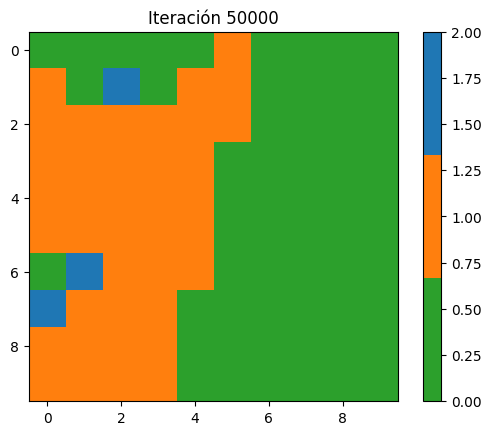

In [22]:
# mapa de colores
title = ('Iteración ' + str(max_iters))
cmap = colors.ListedColormap(
    ['tab:green', 'tab:orange', 'tab:blue'])
plt.imshow(mapa_etiquetas, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [23]:
# etapa de prueba

# normalización de datos de prueba
datos_pruebas = normalizacion(test_x)

# inicialización
etiquetas_ganadoras = []

# aplicación de SOM
for t in range(datos_pruebas.shape[0]):
 ganadora = BMUS(datos_pruebas, t, som)
 row = ganadora[0]
 col = ganadora[1]
 prediccion = mapa_etiquetas[row][col]
 # predicciones
 etiquetas_ganadoras.append(prediccion)

# muestra la medida de exactitud de SOM
print("Exactitud: ",accuracy_score(test_y,
      np.array(etiquetas_ganadoras)))

Exactitud:  0.9781818181818182
